In [5]:
df = redshift.execute("""select DATE_DIFF('hours',a.end_at_c,o.offer_date_time_c),
o.stage_c
from segment_salesforce.auctions a
inner join segment_salesforce.private_sales ps on ps.auction_c = a.id and not ps.is_deleted
inner join segment_salesforce.offers o on ps.id = o.private_sale_c and not o.is_deleted""")

In [6]:
df.head()

,date_diff,stage_c
0,15.0,Offer Sent
1,164.0,No Response
2,26.0,Offer Sent
3,166.0,Offer Sent
4,4.0,Offer Sent


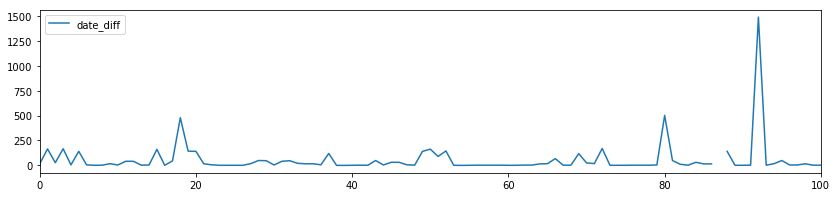

In [7]:
df.plot()

In [10]:
df['bin'] = pd.cut(df.date_diff,bins=[-1,0,1,2,5,10,20,50,100,1000])

In [11]:
df.head()

,date_diff,stage_c,bin
0,15.0,Offer Sent,"(10, 20]"
1,164.0,No Response,"(100, 1000]"
2,26.0,Offer Sent,"(20, 50]"
3,166.0,Offer Sent,"(100, 1000]"
4,4.0,Offer Sent,"(2, 5]"


In [13]:
df['is_won'] = df.stage_c.apply(lambda s: 1 if s == 'Sold' else 0)


In [16]:
df.groupby(['stage_c','bin']).is_won.agg(['size'])

size
stage_c                bin              
Cancelled Sale         (2, 5]          1
Declined               (-1, 0]        10
                       (0, 1]          3
                       (2, 5]          1
                       (5, 10]         1
                       (10, 20]        4
                       (20, 50]        5
                       (50, 100]       1
                       (100, 1000]     2
In Consideration       (0, 1]          1
                       (2, 5]          1
No Response            (-1, 0]         5
                       (0, 1]          9
                       (1, 2]          1
                       (2, 5]          2
                       (20, 50]        4
                       (100, 1000]     6
Offer Sent             (-1, 0]         1
                       (0, 1]          2
                       (2, 5]          3
                       (10, 20]        7
                       (20, 50]        3
                       (50, 100]       1
                       (100, 1000]     6
Opportunity Identified (20, 50]        1
Sold                   (-1, 0]         1
                       (0, 1]          3
                       (1, 2]          1
                       (2, 5]          4
                       (10, 20]        3
                       (20, 50]        2
                       (100, 1000]     1

/Users/nicholassewitz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  'left=%s, right=%s') % (left, right))


stage_c
Cancelled Sale            Axes(0.125,0.125;0.775x0.755)
Declined                  Axes(0.125,0.125;0.775x0.755)
In Consideration          Axes(0.125,0.125;0.775x0.755)
No Response               Axes(0.125,0.125;0.775x0.755)
Offer Sent                Axes(0.125,0.125;0.775x0.755)
Opportunity Identified    Axes(0.125,0.125;0.775x0.755)
Sold                      Axes(0.125,0.125;0.775x0.755)
Name: date_diff, dtype: object

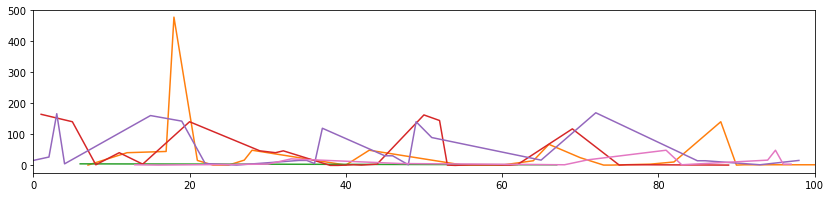

In [20]:
df[df.date_diff < 500].groupby('stage_c').date_diff.plot()